<a href="https://colab.research.google.com/github/tamireszoliveira/Analise-MercadoGames/blob/main/An%C3%A1lise_Mercado_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dados de vendas e classificações de jogos
Conjunto de dados de videogames extraídos do VzCharts.






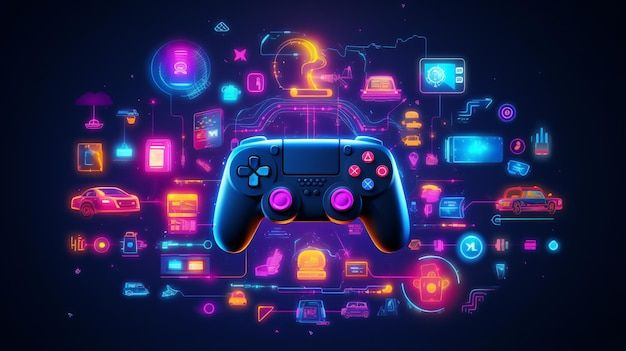


Baixar os Dados [Link da Kaggle para baixar os Dados](https://www.kaggle.com/sidtwr/videogames-sales-dataset?datasetId=189386&sortBy=voteCount)

Utilizar o arquivo: "PS4_GamesSales.csv"

In [2]:
# libs para modelagem e matrizes
import pandas as pd
import numpy as np

#libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns


#lips para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [3]:
# lendo os dados
df = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')
# verificando
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [4]:
#nulos
df.isnull().sum()

,0
Game,0
Year,209
Genre,0
Publisher,209
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


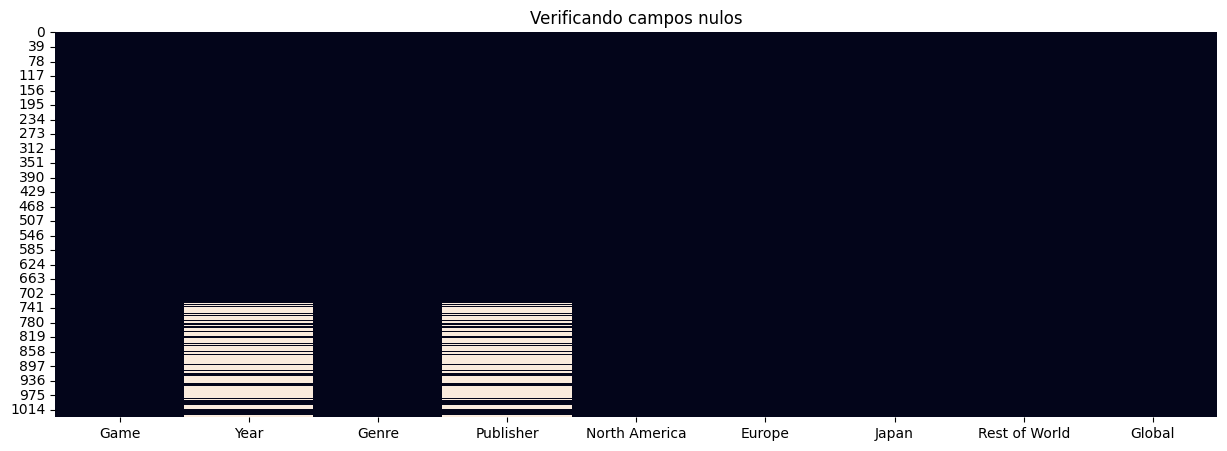

In [5]:
# nulos gráficos
plt.figure( figsize=(15, 5))
plt.title('Verificando campos nulos')
sns.heatmap(df.isnull(), cbar=False);

In [6]:
df.dropna(inplace=True)

In [7]:
#estatisticas
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


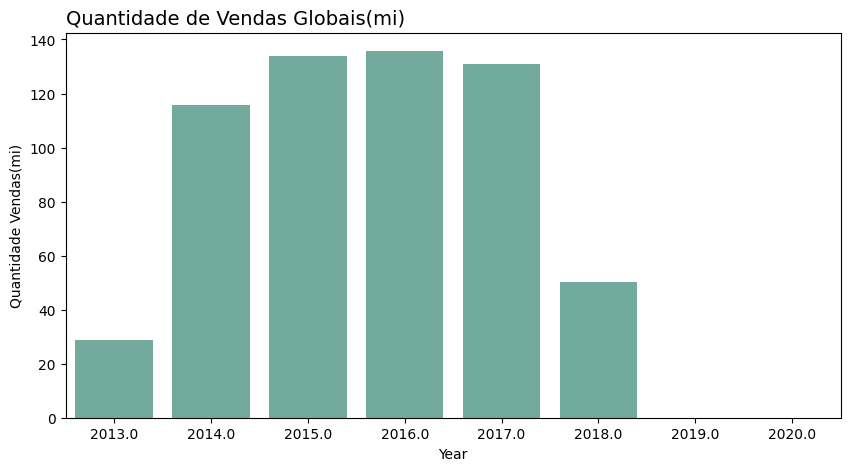

In [8]:
# Tamanho da imagem
plt.figure(figsize=(10,5))
plt.title('Quantidade de Vendas Globais(mi)', loc='left', fontsize=14)
plt.ylabel('Quantidade Vendas(mi)')
sns.barplot(data=df, x='Year', y='Global', color='#69b3a2', ci=None, estimator=sum);

In [9]:
# retirar os anos
df = df.loc[(df['Year'] != 2019) & (df['Year'] != 2020)]
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


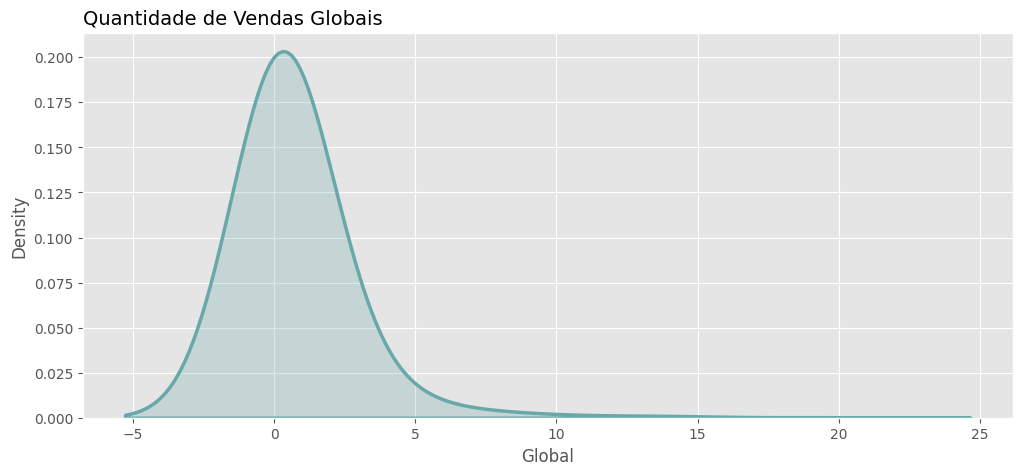

In [10]:
# tamanho
plt.figure(figsize=(12,5))
# estilo
plt.style.use('ggplot')

plt.title('Quantidade de Vendas Globais', loc='left', fontsize=14)
sns.kdeplot(df['Global'], shade=True, bw=1, color='#69a8a8', linewidth=2.5);

In [11]:
df.groupby(by=['Year']).sum()

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


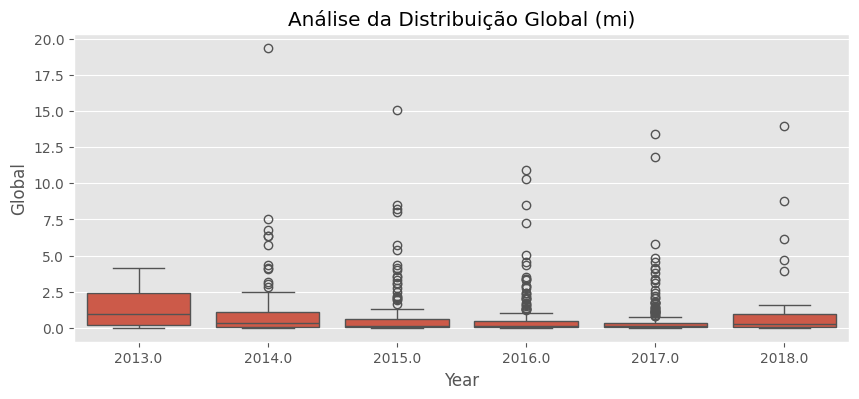

In [12]:
plt.figure(figsize=(10,4))
#plot
plt.title('Análise da Distribuição Global (mi)')
sns.boxplot(data=df, x='Year', y='Global');

Jogos mais vendidos:

In [13]:
df.loc[df['Global'] >=10] #10 como linha de corte

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


Quantos % a América do Norte representa no valor global?

In [14]:
Analise = df.groupby(by=['Year']).sum().reset_index()

# analisando a proporção dos 100% de cada continente comparado ao total
America = [America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europa = [Europa /Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japao = [Japao /Total * 100 for Japao, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [Mundo /Total * 100 for Mundo, Total in zip(Analise['Rest of World'], Analise['Global'])]
America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

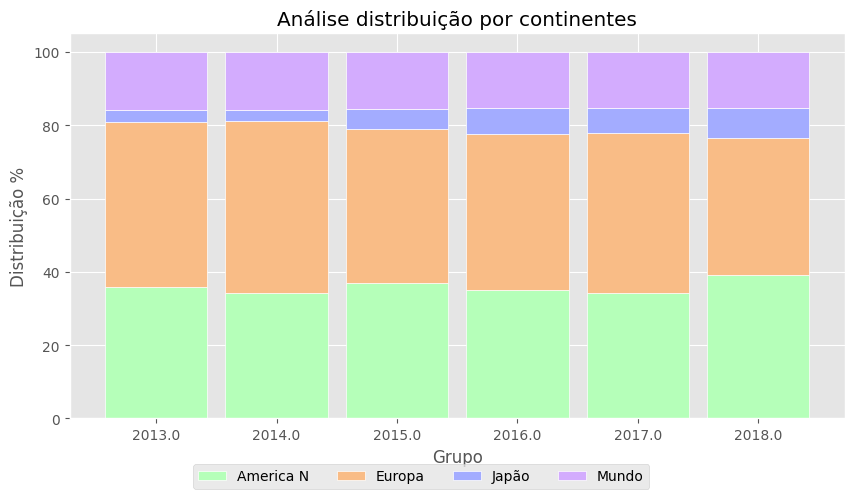

In [19]:
# tamanho
plt.figure(figsize=(10, 5))
#largura barra no grafico
largura = 0.85
rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

plt.title('Análise distribuição por continentes')


# plot America
plt.bar(Grupos, America, width=largura, color='#b5Ffb9', edgecolor='white')
#plot Europa
plt.bar(Grupos, Europa, bottom=America, width=largura, color='#f9bc86', edgecolor='white')
# plot Japão
plt.bar(Grupos, Japao, bottom=[A+B for A, B in zip(America, Europa)], width=largura, color='#a3acff', edgecolor='white')
#plot resto do mundo
plt.bar(Grupos, Mundo, bottom=[A+B+C for A,B,C in zip(America, Europa, Japao)], width=largura, color='#d3acfe', edgecolor='white')

#labels
plt.xticks(Grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
#legenda
plt.legend(['America N', 'Europa', 'Japão', 'Mundo' ], loc = 'upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);

In [21]:
df['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [24]:
# lib para conversão de valor qualitativo em quantitativo
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

df['Produtor'] = Funcao_Label.fit_transform(df['Publisher'])
df['Genero']= Funcao_Label.fit_transform(df['Genre'])
df['Jogo'] = Funcao_Label.fit_transform(df['Game'])
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [25]:
paletacores = sns.color_palette('husl', 8)
paletacores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

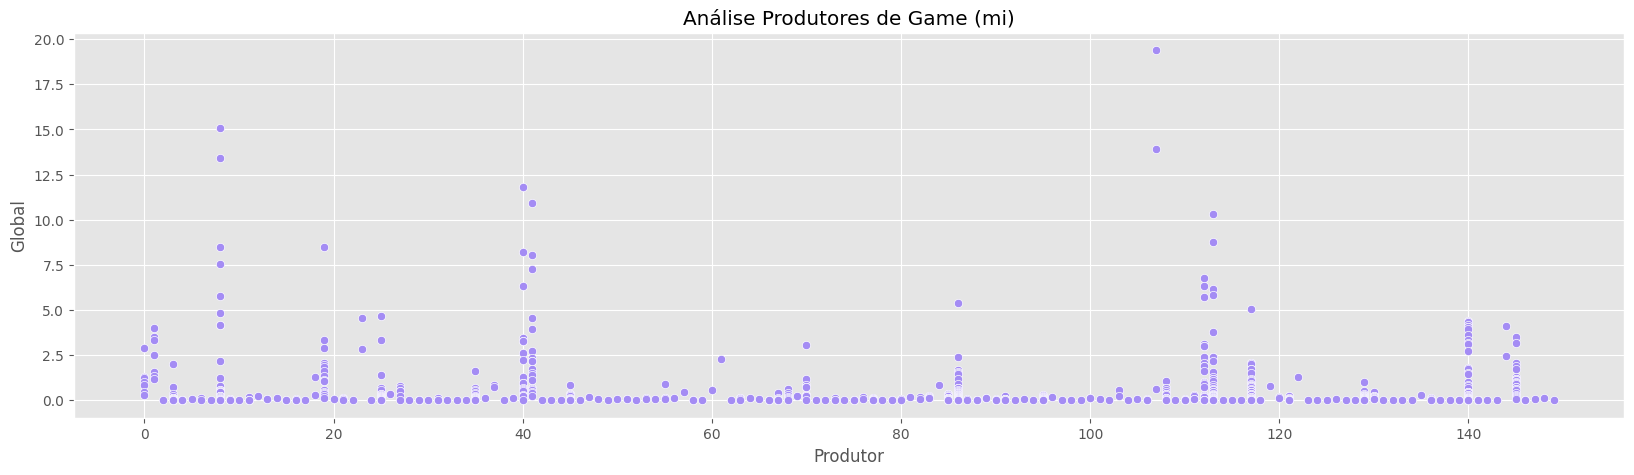

In [31]:
plt.figure(figsize=(20, 5))
plt.title('Análise Produtores de Game (mi)')
sns.scatterplot(data= df, x = 'Produtor', y = 'Global', color=paletacores[6]);

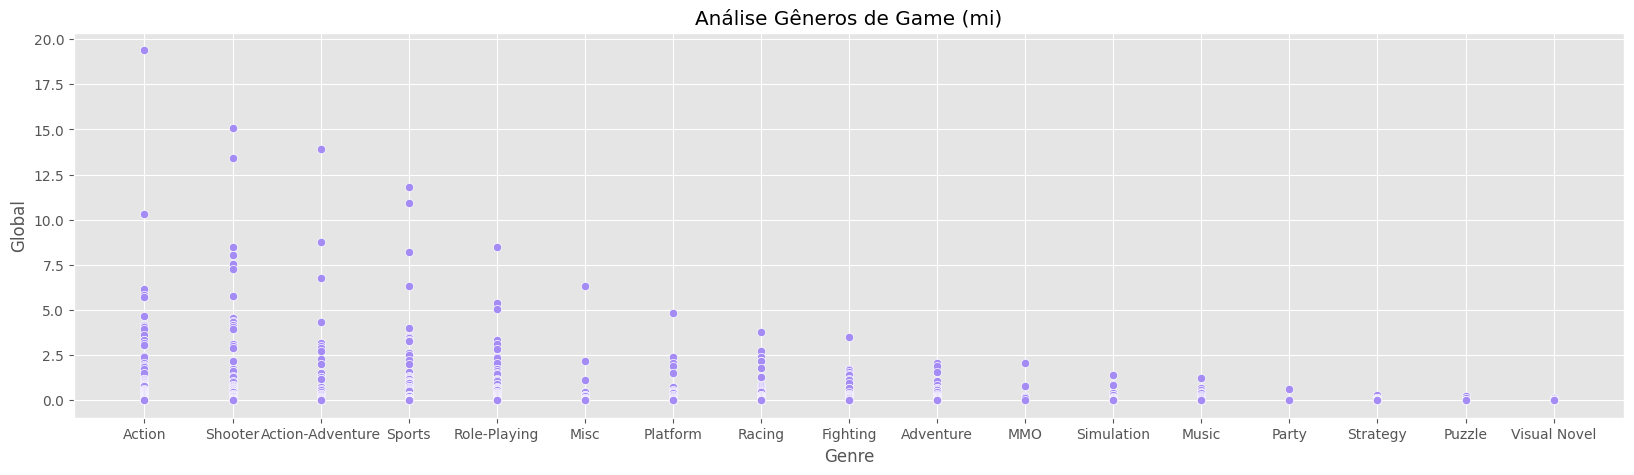

In [30]:
plt.figure(figsize=(20, 5))
plt.title('Análise Gêneros de Game (mi)')
sns.scatterplot(data= df, x = 'Genre', y = 'Global', color=paletacores[6]);

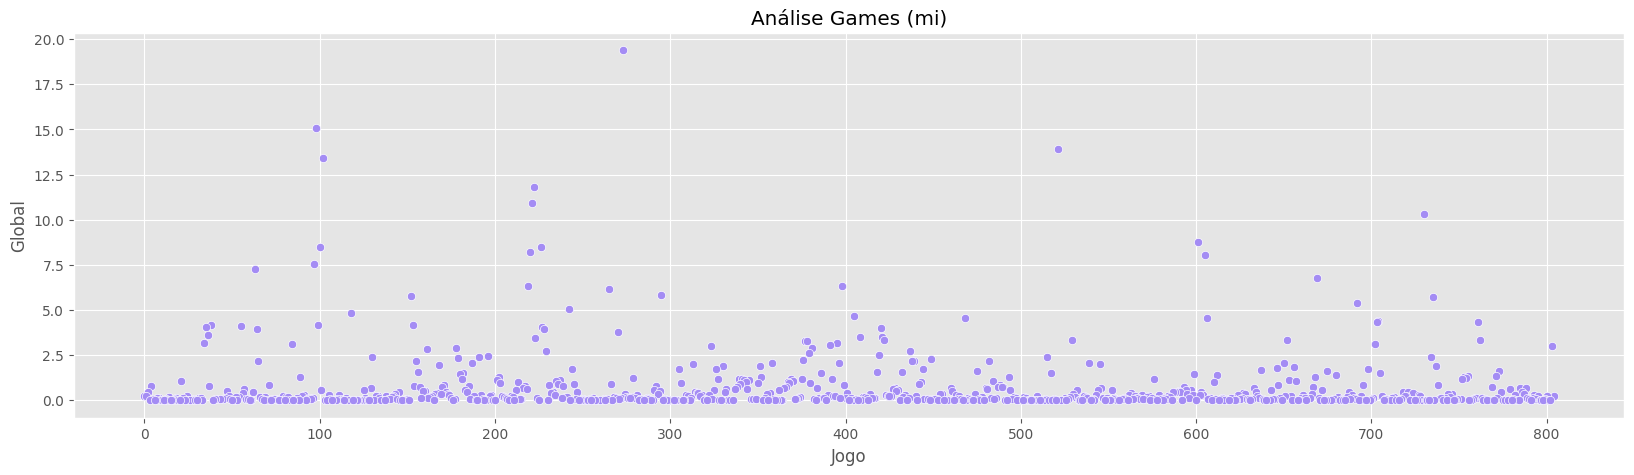

In [32]:
plt.figure(figsize=(20, 5))
plt.title('Análise Games (mi)')
sns.scatterplot(data= df, x = 'Jogo', y = 'Global', color=paletacores[6]);